In [1]:
import numpy as np 
import numpy.linalg as LA 
from viewing_direction import *
from aspire.basis.basis_utils import lgwt
from volume import norm_assoc_legendre_all, cart2sph
import matplotlib.pyplot as plt


j = 5 
alpha = 2 
beta = 3 
gamma = 2

Rot = Rz(alpha) @ Ry(beta) @ Rz(gamma)


Dj = wignerD(j,alpha,beta,gamma)

In [2]:
# should be close to zero 

err = LA.norm(np.eye(2*j+1) - Dj @ np.conj(Dj).T, 'fro')
print(err)

err = LA.norm(np.eye(2*j+1) - np.conj(Dj).T @ Dj , 'fro')
print(err)

1.3619108267767208e-15
1.3616788580309498e-15


In [3]:
# should agree 

lp = norm_assoc_legendre_all(j, np.cos(beta))


for m in range(-j,j+1):
    lpjm = lp[j,abs(m)]*np.exp(-1j*m*alpha)/np.sqrt(2*j+1)

    if m<0:
        lpjm = lpjm*(-1)**m 


    print(Dj[m+j,j],lpjm,abs(lpjm-Dj[m+j,j])/abs(lpjm))


(-2.3296583755296914e-05-1.5104592320554224e-05j) [-2.32965838e-05-1.51045923e-05j] [1.08991754e-14]
(8.96189104547206e-05-0.000609382732023333j) [8.96189105e-05-0.00060938j] [8.36441701e-15]
(0.007803283534917882-0.0022708038217917753j) [0.00780328-0.0022708j] [6.21582898e-15]
(0.04529274927100584+0.052440909042093885j) [0.04529275+0.05244091j] [3.97539876e-15]
(-0.14978683663450806+0.32729020903824096j) [-0.14978684+0.32729021j] [1.34670697e-15]
(-0.8550755669850221+0j) [-0.85507557+0.j] [6.49195853e-16]
(0.14978683663450806+0.32729020903824096j) [0.14978684+0.32729021j] [1.34670697e-15]
(0.04529274927100584-0.052440909042093885j) [0.04529275-0.05244091j] [3.97539876e-15]
(-0.007803283534917882-0.0022708038217917753j) [-0.00780328-0.0022708j] [6.21582898e-15]
(8.96189104547206e-05+0.000609382732023333j) [8.96189105e-05+0.00060938j] [8.36441701e-15]
(2.3296583755296914e-05-1.5104592320554224e-05j) [2.32965838e-05-1.51045923e-05j] [1.08991754e-14]


In [4]:
# generate rotated vectors 

x = np.array([1,2,3])
rx, thx, phx = cart2sph(x[0], x[1], x[2])

y = Rot.T @ x 
ry, thy, phy = cart2sph(y[0], y[1], y[2])


# evaluate rotated spherical harmonics 



lpy = norm_assoc_legendre_all(j, np.cos(thy))
lpx = norm_assoc_legendre_all(j, np.cos(thx))


for m in range(-j,j+1):
    yjm = lpy[j,abs(m)]*np.exp(1j*m*phy)/np.sqrt(4*np.pi)
    if m<0:
        yjm = yjm*(-1)**m 

    _yjm = 0 

    for mp in range(-j,j+1):
        yjmp = lpx[j,abs(mp)]*np.exp(1j*mp*phx)/np.sqrt(4*np.pi)
        if mp<0:
            yjmp = yjmp*(-1)**mp
            
        _yjm += Dj[mp+j,m+j]*yjmp


    print(_yjm,yjm,abs(_yjm-yjm)/abs(yjm))




[-0.06304731+0.00705489j] [-0.06304731+0.00705489j] [2.19178608e-16]
[-0.04937376+0.21571198j] [-0.04937376+0.21571198j] [5.47617935e-16]
[0.34958036+0.21987977j] [0.34958036+0.21987977j] [3.3603915e-16]
[0.2864346-0.22828062j] [0.2864346-0.22828062j] [6.42998724e-16]
[0.02539984+0.07262421j] [0.02539984+0.07262421j] [1.5834412e-15]
[0.38484321-1.56891678e-18j] [0.38484321+0.j] [4.07676873e-18]
[-0.02539984+0.07262421j] [-0.02539984+0.07262421j] [1.89663744e-15]
[0.2864346+0.22828062j] [0.2864346+0.22828062j] [7.57781263e-16]
[-0.34958036+0.21987977j] [-0.34958036+0.21987977j] [3.3603915e-16]
[-0.04937376-0.21571198j] [-0.04937376-0.21571198j] [5.1714484e-16]
[0.06304731+0.00705489j] [0.06304731+0.00705489j] [2.19178608e-16]


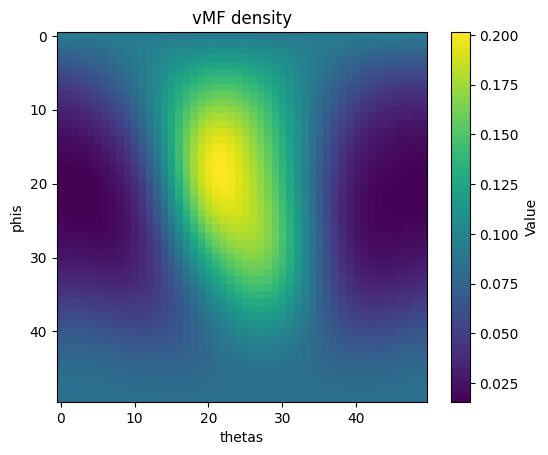

In [5]:
# plot vMF density 

c = 10
centers = np.random.normal(0,1,size=(c,3))
centers /= LA.norm(centers, axis=1, keepdims=True)
w = np.random.uniform(0,1,c)
w = w/np.sum(w)


ngrid = 50 
_ths = np.pi*np.arange(ngrid)/ngrid
_phs = 2*np.pi*np.arange(ngrid)/ngrid

ths, phs = np.meshgrid(_ths,_phs,indexing='ij')
ths, phs = ths.flatten(), phs.flatten()


x1s = np.sin(ths)*np.cos(phs)
x2s = np.sin(ths)*np.sin(phs)
x3s = np.cos(ths)
xs = np.column_stack((x1s,x2s,x3s))

kappa = 3
f = vMF_density(centers,w,kappa,xs)
f = f.reshape((ngrid,ngrid))

plt.imshow(f, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')  # Add a colorbar for reference
plt.title("vMF density")
plt.xlabel("thetas")
plt.ylabel("phis")
plt.show()

In [6]:
# test the if the integral over sphere is 1 


xlege, wlege = lgwt(ngrid, -1, 1)
_ths = np.arccos(xlege)

ths, phs = np.meshgrid(_ths,_phs,indexing='ij')
ths, phs = ths.flatten(), phs.flatten()

_wphs = 2*np.pi*np.ones(ngrid)/ngrid

wths, wphs = np.meshgrid(wlege,_wphs,indexing='ij')
wths, wphs = wths.flatten(), wphs.flatten()
wsph = wths*wphs


x1s = np.sin(ths)*np.cos(phs)
x2s = np.sin(ths)*np.sin(phs)
x3s = np.cos(ths)
xs = np.column_stack((x1s,x2s,x3s))


f = vMF_density(centers,w,kappa,xs)

np.sum(f*wsph)

0.9999999945362683

In [7]:
# test wigner-D transform 

ell_max = 4 
j = 4
mp = 1
m = -2 


def my_fun(alpha,beta,gamma):
    Dj = wignerD(j,alpha,beta,gamma)
    return (1+3j)*Dj[mp+j,m+j]


coef, indices = wignerD_transform(my_fun, ell_max)


print(coef)
print(coef[indices[j,mp,m]])
print(np.sort(abs(coef)))


[ 2.50721752e-19+1.32475953e-18j -1.07674828e-17-5.13640779e-18j
 -5.79370536e-18-1.95088628e-17j  6.91189473e-18+5.25181603e-18j
  2.43945489e-18+9.74087889e-18j -5.50232603e-18+3.94378540e-18j
 -1.13858169e-17-2.42674939e-19j  3.59459607e-18+1.96830340e-17j
 -3.60429460e-17-8.22087827e-18j -5.41897798e-17-3.02221356e-18j
  3.72694497e-17-9.71580672e-17j  7.76898619e-18+2.03525077e-17j
  1.58310458e-18-3.68289925e-18j -3.26086509e-18+1.37642854e-20j
  6.34593114e-18-3.37813415e-17j  1.54295522e-16-3.08218349e-17j
 -1.74895363e-17-2.54787511e-18j -1.34813764e-17+1.75776277e-17j
  9.21571847e-18-2.04837978e-17j  8.79469015e-18-3.34284133e-17j
 -3.77657898e-16-8.90680555e-17j  2.90125725e-17+4.76371330e-18j
 -2.29037709e-18+9.58163670e-18j -2.13926641e-17-2.98155597e-19j
 -3.35552102e-18-1.51805245e-17j  2.40428131e-09+7.21284328e-09j
 -1.39658792e-17-3.82977477e-17j -1.28193354e-16-1.52940269e-17j
 -1.13543073e-16-7.63007279e-18j  1.15674207e-16+2.67493005e-17j
  1.20927142e-16-2.863582

In [8]:
# test sph harm transform 


ell_max = 4 
j = 4
m = -1 
def my_fun(th,ph):
    lpall = norm_assoc_legendre_all(j,np.cos(th))
    lpall /= np.sqrt(4*np.pi)
    if m<0:
        lpall = lpall*(-1)**m
    exp_m = np.exp(1j*m*ph)
    return (0.5+0.5*1j)*lpall[j,abs(m),:]*exp_m


coef, indices = sph_harm_transform(my_fun, ell_max)

print(coef)
print(coef[indices[j,m]])
print(np.sort(abs(coef)))


[-4.98732999e-18+3.46944695e-18j  8.00495181e-08+8.00495181e-08j
 -1.38777878e-17-1.73472348e-17j -1.12757026e-17-1.82145965e-17j
  1.12757026e-17-5.52943108e-18j -3.10252191e-08-3.10252191e-08j
 -3.03576608e-18-6.93889390e-18j -1.21430643e-17+5.20417043e-18j
 -2.60208521e-18+6.07153217e-18j -3.90312782e-18+4.77048956e-18j
  0.00000000e+00-8.23993651e-18j -4.29092025e-08-4.29092025e-08j
 -3.85975973e-17-5.89805982e-17j  0.00000000e+00+0.00000000e+00j
  1.73472348e-18-1.30104261e-18j -8.67361738e-19-3.25260652e-19j
 -3.25260652e-18-2.16840434e-18j  4.77048956e-17+3.81639165e-17j
 -3.46944695e-18-4.55364912e-18j  4.99999990e-01+4.99999990e-01j
  2.81892565e-18+1.73472348e-18j -3.81639165e-17+8.67361738e-17j
 -6.93889390e-18+1.21430643e-17j -9.54097912e-18-5.11743425e-17j
  4.11996826e-18-1.14925430e-17j]
(0.4999999901761916+0.4999999901761916j)
[0.00000000e+00 9.26342742e-19 2.16840434e-18 3.30992558e-18
 3.90914653e-18 5.72475174e-18 6.07540308e-18 6.16376325e-18
 6.60563020e-18 7.57391